In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [106]:
Time = [ 0,0.5,1,1.5,2]
ReservoirPressure = [1798,1680,1540,1428,1335]
Z = [0.869,0.870,0.880,0.890,0.900]
Gp = [0,0.96,2.12,3.21,3.92]
df = pd.DataFrame({"Time(years)":Time,"ReservoirPressure(psia)":ReservoirPressure, "Z factor": Z, "Cumulative Gas Produced Gp(MMMSCF)": Gp  })
df['P/Z']= df['ReservoirPressure(psia)']/df['Z factor']
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,0.0,1798,0.869,0.00,2069.044879
1,0.5,1680,0.870,0.96,1931.034483
2,1.0,1540,0.880,2.12,1750.000000
3,1.5,1428,0.890,3.21,1604.494382
4,2.0,1335,0.900,3.92,1483.333333


In [160]:
x = df["Cumulative Gas Produced Gp(MMMSCF)"]
y = df['P/Z']


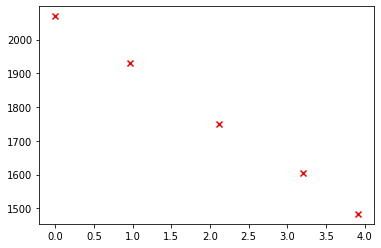

In [161]:
plt.scatter(x,y,marker = 'x',color = 'red')

In [162]:
model = np.polyfit(x, y, 1)
model

array([-148.2874553 , 2070.38439919])

In [163]:
PZZ = np.arange(2070.38439919,0,-1)
GPP = (PZ-2070.38439919)/-148.2874553


In [164]:
DF = pd.DataFrame({"Cumulative Gas Produced Gp(MMMSCF)": GPP, "P/Z": PZ})
DF

,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,-0.000000,2070.384399
1,0.006744,2069.384399
2,0.013487,2068.384399
3,0.020231,2067.384399
4,0.026975,2066.384399
...,...,...
2066,13.932399,4.384399
2067,13.939143,3.384399
2068,13.945886,2.384399
2069,13.952630,1.384399


In [236]:
XX = [0.1,1,2,3.2,3.98]
YY = [2069.044879,1870,1750,1650,1500]

In [239]:
Initial_gas_in_place =  (20-2070.38439919)/-148.2874553
Initial_gas_in_place

13.827092757387144

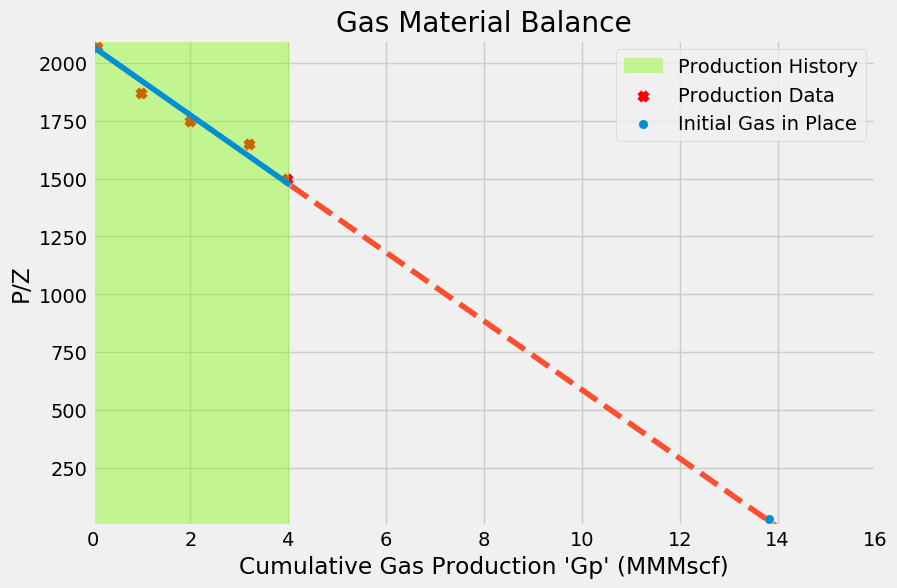

The Gas Initially in place is 13.827092757387144 MMMscf


In [253]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9,6))
plt.plot(DF["Cumulative Gas Produced Gp(MMMSCF)"][1:600],DF["P/Z"][1:600])
plt.plot(DF["Cumulative Gas Produced Gp(MMMSCF)"][601:2072],DF["P/Z"][601:2072], ls = "--")
plt.scatter(XX,YY,marker = 'x',color = 'red',label = "Production Data")
plt.scatter(g,30, label = "Initial Gas in Place")
plt.xlim(0,16)
plt.ylim(1,2100)
plt.axvspan(0,4,alpha=0.4,label='Production History',color='chartreuse')
plt.xlabel("Cumulative Gas Production 'Gp' (MMMscf)")
plt.ylabel("P/Z")
plt.title("Gas Material Balance")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("The Gas Initially in place is", Initial_gas_in_place,"MMMscf")